In [218]:
import pandas as pd
import lightkurve as lk
import numpy as np

In [219]:
tess_wtv = pd.read_csv('wtv-161_RaDec_corr1.csv', sep=",")

In [220]:
tess_wtv

,RA,DEC,S1,S2,S3,S4,S5,S6,S7,S8,...,S46,S47,S48,S49,S50,S51,S52,S53,S54,S55
0,190.4149,-1.4495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,184.9764,-0.6672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,188.4445,-9.4523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,189.5938,1.8547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,190.9082,-1.5764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,294.1764,-24.8850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,283.5429,-22.7444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,288.8850,-25.2573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,289.4091,-18.9532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
stars_list = pd.read_csv('161_merged_by_epic.csv', sep=",")["Name"]

In [222]:
stars_list

0        Porrima
1         Zaniah
2         21 Vir
3         FW Vir
4        HR 4837
         ...    
156       52 Sgr
157    Ainalrami
158      psi Sgr
159       43 Sgr
160      nu2 Sgr
Name: Name, Length: 161, dtype: object

In [223]:
md = pd.concat([stars_list, tess_wtv], axis=1)

In [224]:
md
md.to_csv('md_check.csv')

In [225]:
md1 = md.filter(regex="S[1-3]")
md_summ = md1.sum(axis=1)
md_summ = pd.DataFrame({'cam':md_summ.values})

In [226]:
observed_stars_cycle123 = md.loc[md_summ.index[md_summ['cam'] >=1]]["Name"]

In [227]:
observed_stars_cycle123 = pd.DataFrame({'Index*':observed_stars_cycle123.index, 'Name':observed_stars_cycle123.values})

In [228]:
observed_stars_cycle123

,Index*,Name
0,10,45 Oph
1,16,HR 6366
2,51,rho Tau
3,52,11 Ori
4,54,15 Ori
5,57,HR 1684
6,60,81 Tau
7,63,80 Tau
8,66,89 Tau
9,67,HR 1576


In [229]:
%matplotlib inline

In [230]:
lcs = dict()
for target_name in observed_stars_cycle123["Name"]:
    lcs[target_name] = lk.search_lightcurve(target_name,exptime=120).download_all()
    print(target_name)
#lcs["45 Oph"][0]

45 Oph
HR 6366
rho Tau
11 Ori
15 Ori
HR 1684
81 Tau
80 Tau
89 Tau


HR 1576
42 Cet
HR 5059
49 Cnc
21 Cnc
Alcyone
Atlas
Electra
Merope
Maia
Taygeta
Pleione
gam Tau
del1 Tau


/Users/research/.local/lib/python3.8/site-packages/lightkurve/search.py:414: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(


69 Vir
Ascella


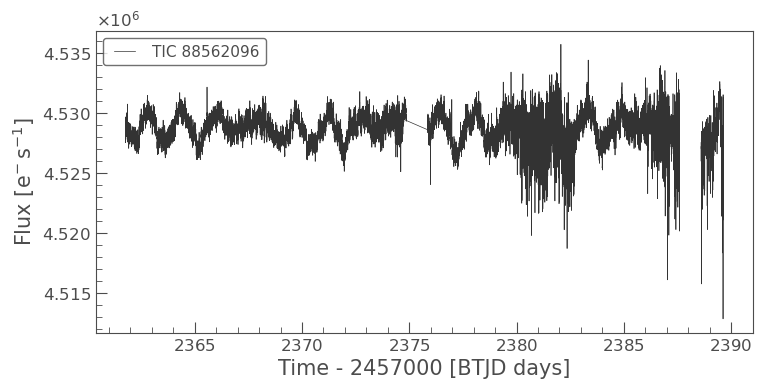

In [231]:
lcs["45 Oph"][1].plot();

In [232]:
target_name='45 Oph'
lc = lk.search_lightcurve(target_name,exptime=120).download_all()

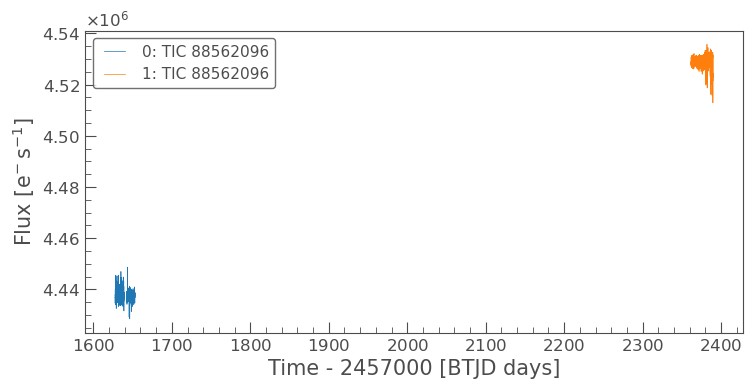

In [233]:
lc.plot();

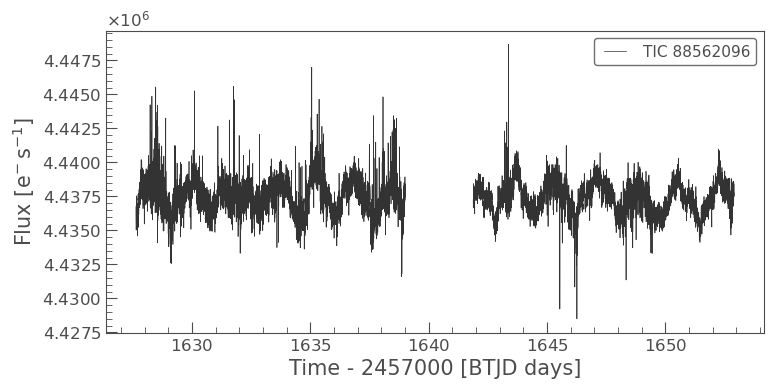

In [234]:
lc[0].plot();

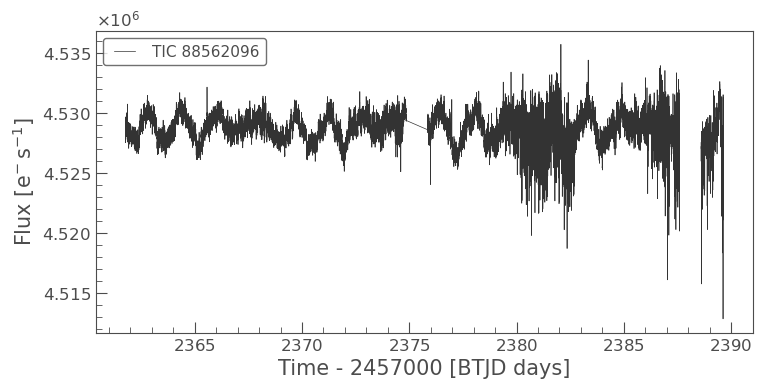

In [235]:
lc[1].plot();

In [236]:
tfp = lk.search_targetpixelfile("Alcyone").download()

In [237]:
tfp.animate()

In [238]:
tfp.meta['MISSION']

'K2'

In [239]:
lcs["45 Oph"][1].meta['MISSION']

'TESS'

In [240]:
lcs

{'45 Oph': LightCurveCollection of 2 objects:
     0: <TessLightCurve LABEL="TIC 88562096" SECTOR=12 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
     1: <TessLightCurve LABEL="TIC 88562096" SECTOR=39 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>,
 'HR 6366': LightCurveCollection of 1 objects:
     0: <TessLightCurve LABEL="TIC 43680999" SECTOR=12 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>,
 'rho Tau': LightCurveCollection of 2 objects:
     0: <TessLightCurve LABEL="TIC 245860427" SECTOR=5 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
     1: <TessLightCurve LABEL="TIC 245860427" SECTOR=32 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>,
 '11 Ori': LightCurveCollection of 2 objects:
     0: <TessLightCurve LABEL="TIC 303767154" SECTOR=5 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
     1: <TessLightCurve LABEL="TIC 303767154" SECTOR=32 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>,
 '15 Ori': LightCurveCollection of 1 objects:
     0: <TessLightCurve LABEL="TIC 293830360" SECTOR=32 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>,
 'HR 1684': LightCurveCo

In [241]:
entries_to_remove = ('Alcyone','Atlas', 'Electra', 'Merope', 'Maia', 'Taygeta', 'Pleione', 'gam Tau', 'del1 Tau')
for k in entries_to_remove:
    lcs.pop(k, None)
#data in not avaliable yet

In [242]:
lcs.keys()

dict_keys(['45 Oph', 'HR 6366', 'rho Tau', '11 Ori', '15 Ori', 'HR 1684', '81 Tau', '80 Tau', '89 Tau', 'HR 1576', '42 Cet', 'HR 5059', '49 Cnc', '21 Cnc', '69 Vir', 'Ascella'])

In [243]:
entries_to_remove = ('45 Oph','69 Vir', 'HR 6366')
for k in entries_to_remove:
    lcs.pop(k, None) 
#no K2 fits for these stars

In [245]:
lcs.keys()

dict_keys(['rho Tau', '11 Ori', '15 Ori', 'HR 1684', '81 Tau', '80 Tau', '89 Tau', 'HR 1576', '42 Cet', 'HR 5059', '49 Cnc', '21 Cnc', 'Ascella'])

In [246]:
#lc = lc.remove_nans().normalize()   - for tess
#from astropy.timeseries import LombScargle - for K2

In [247]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt

image_file = get_pkg_data_filename('fits/Ascella.fits')
fits.info(image_file)

Filename: fits/Ascella.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      65   (39, 39)   float64   
  1                1 BinTableHDU     34   3655R x 12C   [D, D, D, D, D, D, D, D, D, D, D, D]   


In [248]:
hdu = fits.open(image_file)

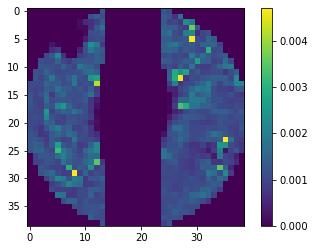

In [249]:
image_data = hdu[0].data
plt.figure()
plt.imshow(image_data)
plt.colorbar()

In [250]:
series_data = pd.DataFrame(hdu[1].data)
print(series_data)

             time         flux    flux_err  centroid_col  centroid_row  \
0     2470.018722  9312.221680  246.398636     45.943942    869.945039   
1     2470.039154  9313.494141  246.081024     45.910082    869.961348   
2     2470.059587  9313.868164  245.842422     45.877819    869.978710   
3     2470.080019  9313.158203  245.684692     45.844279    869.996875   
4     2470.100451  9313.945312  245.609879     45.813255    870.013428   
...           ...          ...         ...           ...           ...   
3650  2549.743419  9390.158203  236.941849     45.462373    869.940560   
3651  2549.763851          NaN  236.720932     45.395486    869.980742   
3652  2549.784283  9392.456055  237.014954     45.306871    870.022434   
3653  2549.804715          NaN  237.612808     45.218068    870.038475   
3654  2549.845579  9389.423828  238.844772     45.794342    869.843340   

       quality  cadenceno  pos_corr1  pos_corr2  tr_position      tr_time  \
0          0.0   115549.0   0.1290

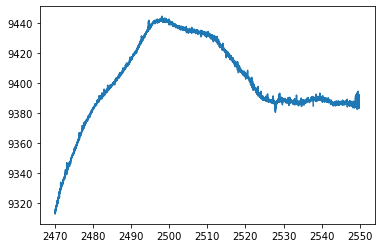

In [251]:
plt.plot(series_data['time'], series_data['corr_flux'])

In [252]:
from astropy.timeseries import LombScargle

t = series_data['time']
y = series_data['corr_flux']
frequency, power = LombScargle(t, y).autopower()

In [253]:
frequency

array([1.25271123e-03, 3.75813370e-03, 6.26355616e-03, ...,
       1.14461478e+02, 1.14463983e+02, 1.14466489e+02])

In [254]:
power

array([nan, nan, nan, ..., nan, nan, nan])

In [255]:
series_data['corr_flux'].isnull().sum()

15

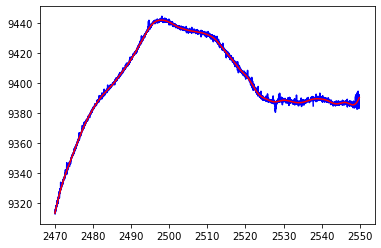

In [256]:
plt.plot(series_data['time'], series_data['corr_flux'], 'b')
plt.plot(series_data['time'], series_data['tr_time'], 'r')

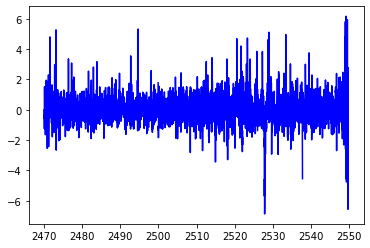

In [257]:
plt.plot(series_data['time'], series_data['corr_flux']-series_data['tr_time'], 'b')

In [258]:
data_no_trend = series_data['corr_flux']-series_data['tr_time'] + series_data['tr_time'].median()
normalized1 = data_no_trend/series_data['tr_time'].median()

In [259]:
normalized1.median()

0.9999985755591065

In [260]:
normalized1 = normalized1.fillna(normalized1.median())

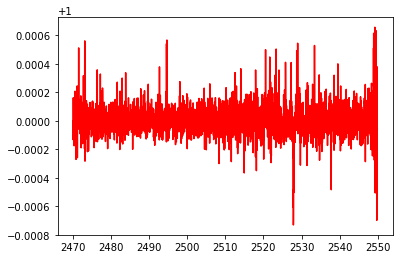

In [261]:
plt.plot(series_data['time'], normalized1, 'r')

In [262]:
norm = series_data['corr_flux']/series_data['corr_flux'].median()

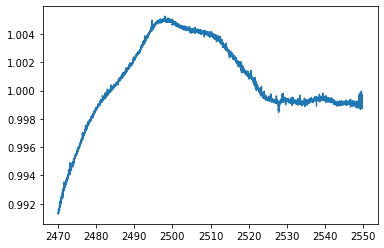

In [263]:
plt.plot(series_data['time'], norm)

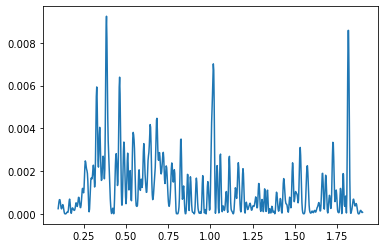

In [284]:
from astropy.timeseries import LombScargle
t = series_data['time']
y = normalized1
frequency, power = LombScargle(t, y).autopower(minimum_frequency=0.1,maximum_frequency=1.9)
plt.plot(frequency, power)     